<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Mental_Health_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **L'objectif est de créer un modèle qui permet de prédire si une personne est depressif (1) ou non-depressif (0).**

La variable cible est "Depression"

In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel('train.xlsx')

In [2]:
data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
summary = data.describe()

## **Analyse des valeurs manquantes**

In [4]:
import numpy as np  # Réimportation de numpy

# Analyse des valeurs manquantes
missing_values = data.isnull().sum() / len(data) * 100
missing_summary = pd.DataFrame({'Column': data.columns, 'MissingPercentage': missing_values}).sort_values(by='MissingPercentage', ascending=False)

# Statistiques descriptives pour identifier les valeurs aberrantes (pour les colonnes numériques)
numerical_columns = data.select_dtypes(include=[np.number]).columns
numerical_summary = data[numerical_columns].describe().transpose()

# Afficher les résultats des valeurs manquantes et des statistiques descriptives
missing_summary
#numerical_summary

,Column,MissingPercentage
Study Satisfaction,Study Satisfaction,80.172708
Academic Pressure,Academic Pressure,80.172708
CGPA,CGPA,80.171997
Profession,Profession,26.034115
Work Pressure,Work Pressure,19.842217
Job Satisfaction,Job Satisfaction,19.836532
Dietary Habits,Dietary Habits,0.002843
Financial Stress,Financial Stress,0.002843
Degree,Degree,0.001421
Family History of Mental Illness,Family History of Mental Illness,0.000000


Certaines colonnes ont un pourcentage significatif de valeurs manquantes, par exemple, "Academic Pressure", "CGPA" et "Study Satisfaction". On va les supprimer.

**Suppression de certaines colonnes et imputation d'autres colonnes.**

In [5]:
# Imputation des colonnes numériques par la moyenne (ou médiane si nécessaire)

data['Work Pressure'].fillna(data['Work Pressure'].mean(), inplace=True)
data['Job Satisfaction'].fillna(data['Job Satisfaction'].mean(), inplace=True)

# Imputation des colonnes catégoriques par le mode
categorical_columns = ['Profession', 'Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Suppression des colonnes ayant trop de valeurs manquantes (>50%) si elles existent
data.drop(columns=['Academic Pressure', 'Study Satisfaction'], inplace=True)
data.drop(columns=['CGPA'], inplace=True)

# Vérification des valeurs manquantes après imputation
#missing_after_imputation = data.isnull().sum()

data.head(5)

<ipython-input-5-cfce19bcec0a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Work Pressure'].fillna(data['Work Pressure'].mean(), inplace=True)
<ipython-input-5-cfce19bcec0a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.000000,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.000000,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,2.998998,2.974404,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.000000,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.000000,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


**Détection des valeurs aberrantes**

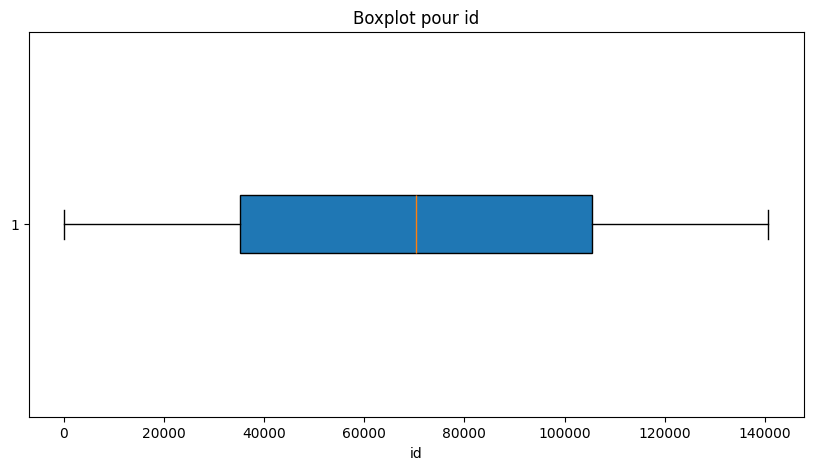

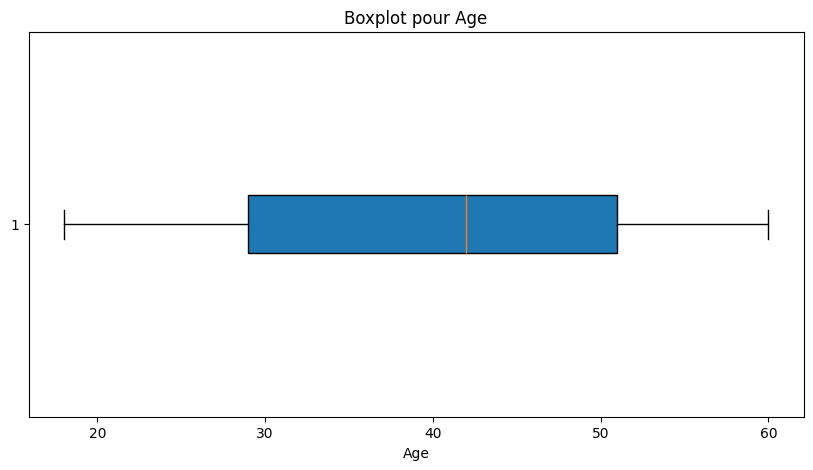

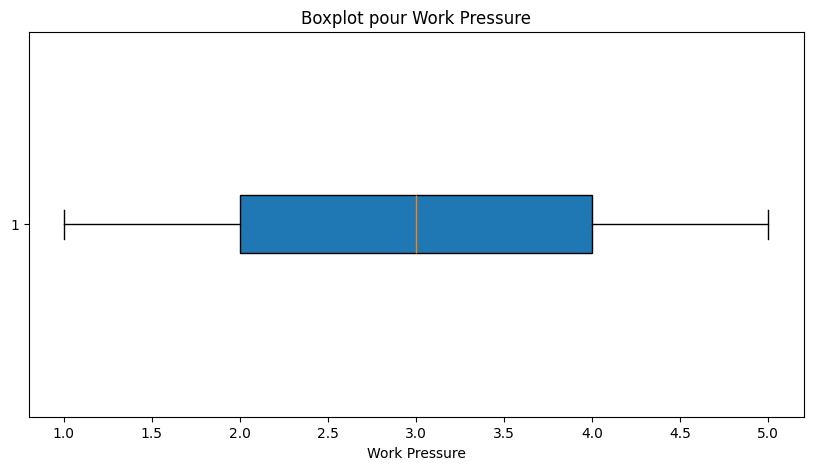

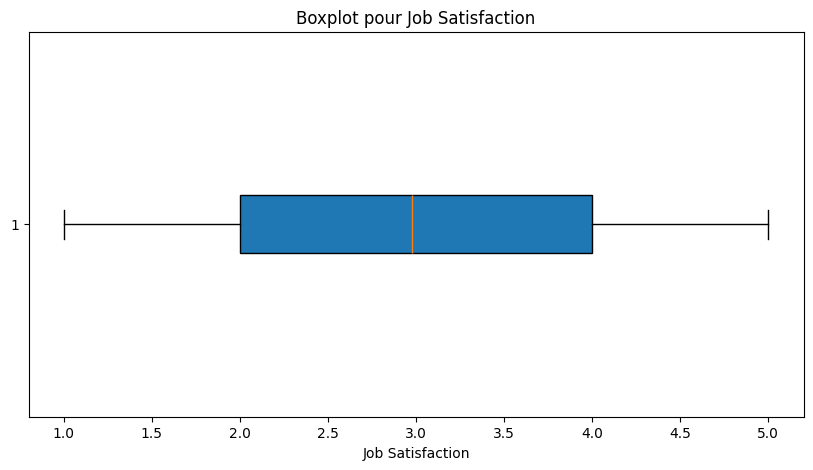

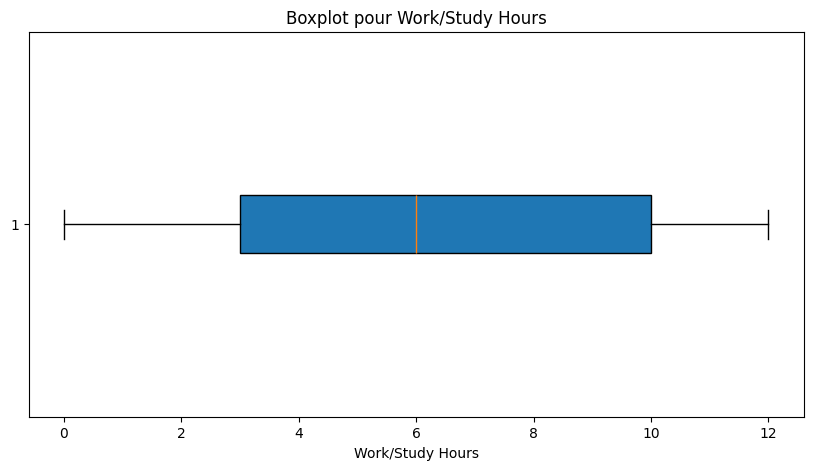

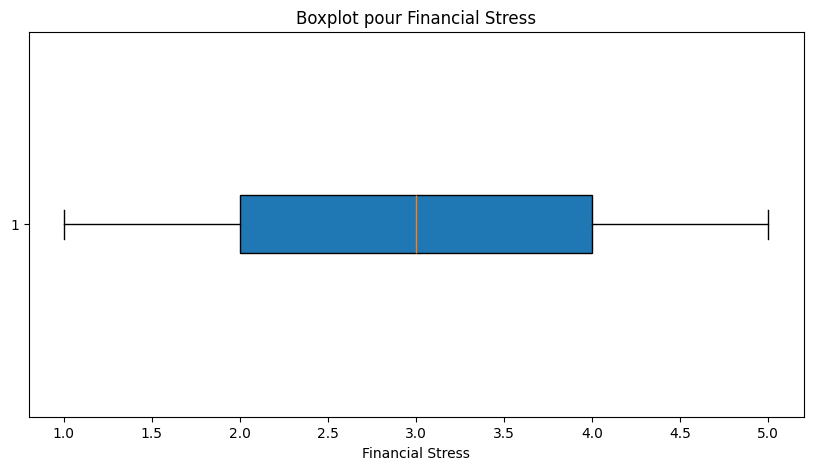

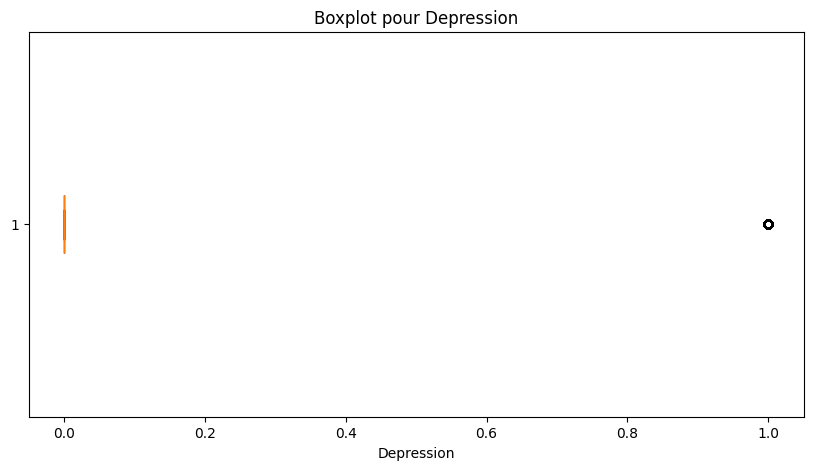

In [6]:
import matplotlib.pyplot as plt

# Détection de valeurs aberrantes pour les colonnes numériques
# Utilisation de boxplots pour visualiser les valeurs aberrantes
numerical_columns = data.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data[column].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot pour {column}")
    plt.xlabel(column)
    plt.show()


De manière générale, on observe pas de valeurs aberrantes significatives

Quoi faire avant,  l'encodage des variables catégories pour prépare les données au modèle ou bien la construction des visualisations exploratoires entre les variables indépendantes et la cible Depression ?